<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/9_Data_Capstone_Project_911_calls_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
sns.set()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/911.csv')
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


What are the top 5 zipcodes for 911 calls?

In [ ]:
print(df['zip'].value_counts().head(5))

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64


What are the top 5 townships (twp) for 911 calls?

In [ ]:
print(df['twp'].value_counts().head(5))

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


Take a look at the 'title' column, how many unique title codes are there?

In [ ]:
print(df['title'].nunique())

110


In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, 
and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that 
contains this string value.

In [ ]:
df['Reason'] = df['title'].apply(lambda text: text.split(':')[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


What is the most common Reason for a 911 call based off of this new column?

In [ ]:
print(df['Reason'].value_counts())

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


Now use seaborn to create a countplot of 911 calls by Reason.

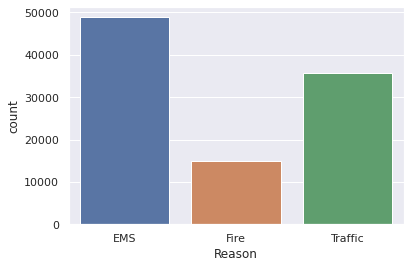

In [ ]:
sns.countplot(x='Reason', data=df)
plt.show()

Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [ ]:
print(type(df['timeStamp'].iloc[1]))

<class 'str'>


You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda tm: tm.hour)
df['Month'] = df['timeStamp'].apply(lambda tm: tm.month)
df['Day of Week'] = df['timeStamp'].apply(lambda tm: tm.weekday())

Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [ ]:
dmap = {0:'0-Mon',1:'1-Tue',2:'2-Wed',3:'3-Thu',4:'4-Fri',5:'5-Sat',6:'6-Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
print(df[['timeStamp','Hour','Month','Day of Week']])

                timeStamp  Hour  Month Day of Week
0     2015-12-10 17:40:00    17     12       3-Thu
1     2015-12-10 17:40:00    17     12       3-Thu
2     2015-12-10 17:40:00    17     12       3-Thu
3     2015-12-10 17:40:01    17     12       3-Thu
4     2015-12-10 17:40:01    17     12       3-Thu
...                   ...   ...    ...         ...
99487 2016-08-24 11:06:00    11      8       2-Wed
99488 2016-08-24 11:07:02    11      8       2-Wed
99489 2016-08-24 11:12:00    11      8       2-Wed
99490 2016-08-24 11:17:01    11      8       2-Wed
99491 2016-08-24 11:17:02    11      8       2-Wed

[99492 rows x 4 columns]


Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

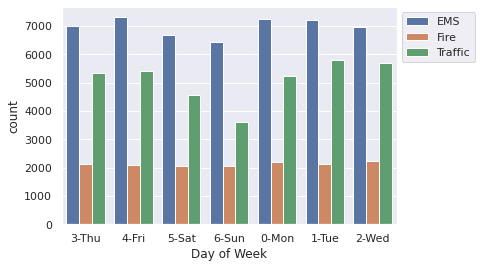

In [ ]:
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Now do the same for Month:

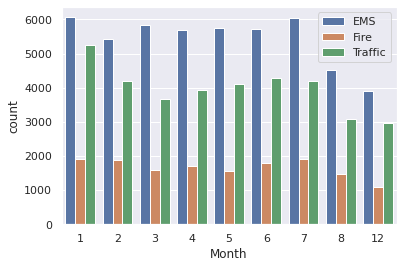

In [ ]:
sns.countplot(x='Month', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation

In [ ]:
bymon = df.groupby('Month')
data = bymon.count()

Now create a simple plot off of the dataframe indicating the count of calls per month.

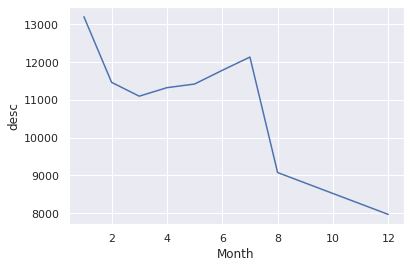

In [ ]:
sns.lineplot(data=data, x="Month", y="desc")
plt.show()

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month

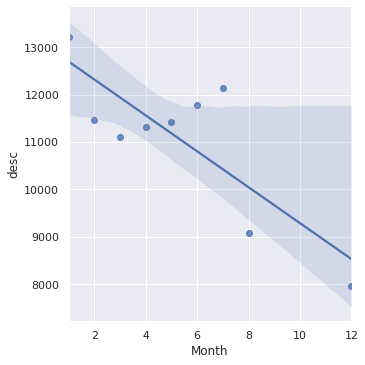

In [ ]:
data = data.reset_index()
sns.lmplot(x="Month", y="desc", data=data)
plt.show()

Create a new column called 'Date' that contains the date from the timeStamp column.

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda tm: tm.date())

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

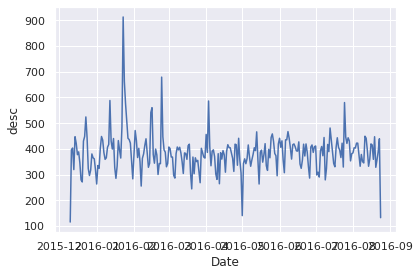

In [ ]:
bydate = df.groupby('Date')
data = bydate.count()
sns.lineplot(data=data, x="Date", y="desc")
plt.tight_layout()
plt.show()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

In [ ]:
def aux_plot(reason):
	bydate = df[df['Reason'] == reason].groupby('Date')
	data = bydate.count()
	sns.lineplot(data=data, x="Date", y="desc").set_title(reason)
	plt.tight_layout()
	plt.show()

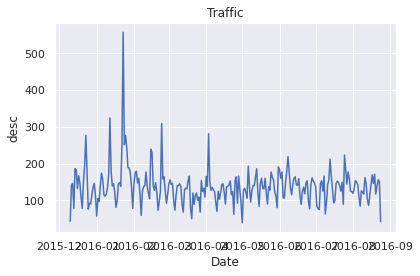

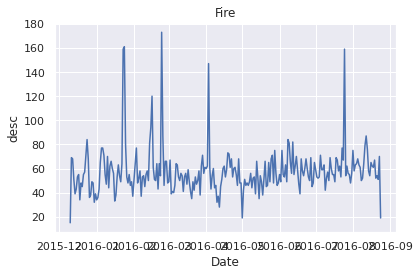

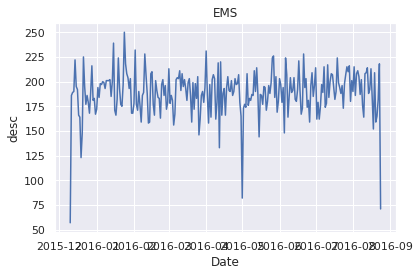

In [ ]:
aux_plot('Traffic')
aux_plot('Fire')
aux_plot('EMS')

We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [ ]:
dfaux = df.pivot_table(values='lat',index='Day of Week',columns='Hour') #criando matriz vazia
dfaux2 = df.reset_index()
dfaux2 = dfaux2.pivot_table(values = ['Hour','lat'], index=['Day of Week','index'])#criando matriz auxilar

for i in dfaux.index:
	dfaux.loc[i] = dfaux2.loc[i].groupby('Hour').count()['lat']

Now create a HeatMap using this new DataFrame.

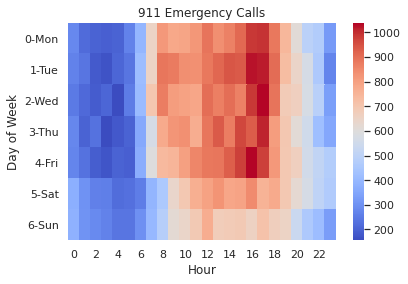

In [ ]:
ax = plt.axes()
sns.heatmap(dfaux, cmap='coolwarm', annot=False)
ax.set_title('911 Emergency Calls')
plt.show()

Now create a clustermap using this DataFrame.

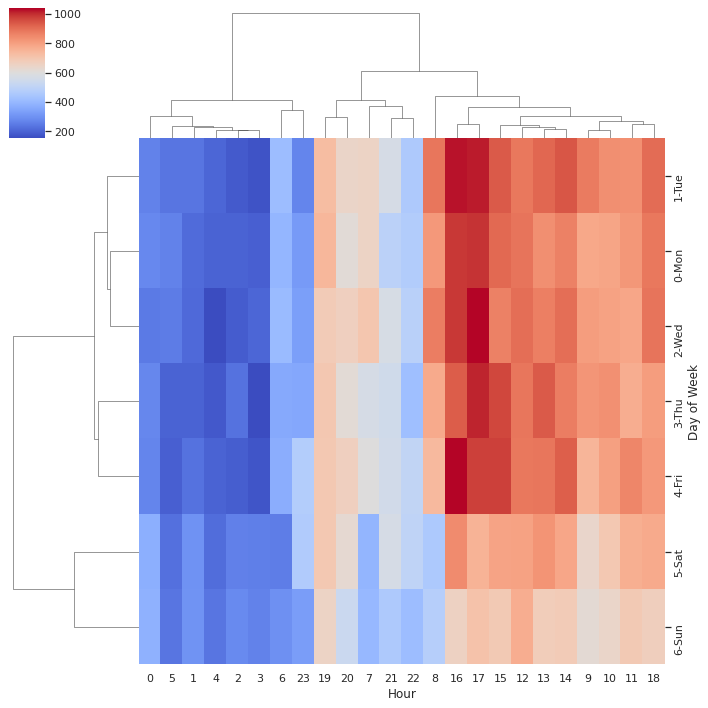

In [ ]:
sns.clustermap(dfaux, cmap='coolwarm')
plt.show()

Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. 

In [ ]:
dfaux = df.pivot_table(values='lat',index='Day of Week',columns='Month')
dfaux2 = df.reset_index()
dfaux2 = dfaux2.pivot_table(values = ['Month','lat'], index=['Day of Week','index'])

for i in dfaux.index:
	dfaux.loc[i] = dfaux2.loc[i].groupby('Month').count()['lat']

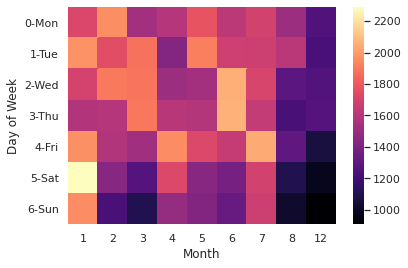

In [ ]:
sns.heatmap(dfaux, cmap='magma', annot=False)
plt.show()

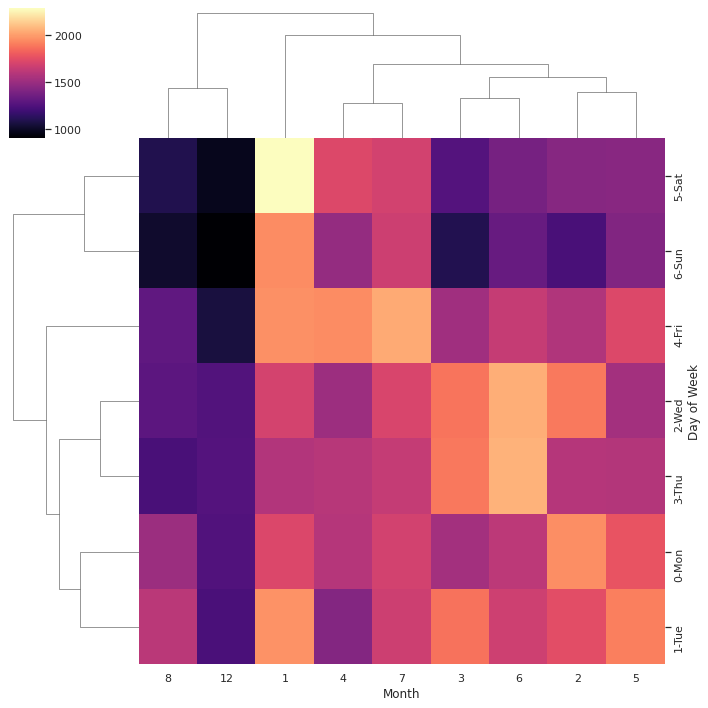

In [ ]:
sns.clustermap(dfaux, cmap='magma')
plt.show()